In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [42]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [43]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
train.size

118260

In [44]:
test.size

116720

In [47]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [48]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [49]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [50]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [51]:
train.groupby('SaleType').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
SaleType,,,,,,,,,,,,,,,,,,,,,
COD,43,43,43,32,43,43,3,43,43,43,...,43,43,0,13,2,43,43,43,43,43
CWD,4,4,4,4,4,4,1,4,4,4,...,4,4,0,2,0,4,4,4,4,4
Con,2,2,2,2,2,2,0,2,2,2,...,2,2,0,0,0,2,2,2,2,2
ConLD,9,9,9,8,9,9,0,9,9,9,...,9,9,0,2,1,9,9,9,9,9
ConLI,5,5,5,4,5,5,1,5,5,5,...,5,5,0,1,1,5,5,5,5,5
ConLw,5,5,5,5,5,5,0,5,5,5,...,5,5,0,0,0,5,5,5,5,5
New,122,122,122,121,122,122,7,122,122,122,...,122,122,1,0,0,122,122,122,122,122
Oth,3,3,3,3,3,3,0,3,3,3,...,3,3,0,1,1,3,3,3,3,3
WD,1267,1267,1267,1022,1267,1267,79,1267,1267,1267,...,1267,1267,6,262,49,1267,1267,1267,1267,1267


In [52]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [54]:
#Select numberical features and categorical features
numberic_features=train.select_dtypes(include=[np.number])
categorical_features=train.select_dtypes(include=[np.object])

In [55]:
# Target Value Analysis
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\i_lovedeepika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


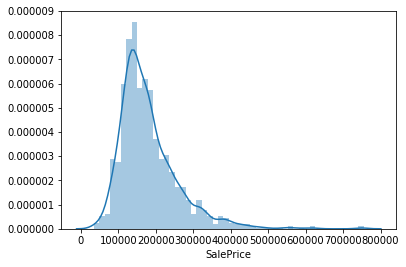

In [56]:
sns.distplot(df['SalePrice'],bins=50, hist=True)

In [57]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Visualizations

## Scatterplot
### Purpose is to identify the type of relationship (if any) between two quantitative variables

In [58]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']

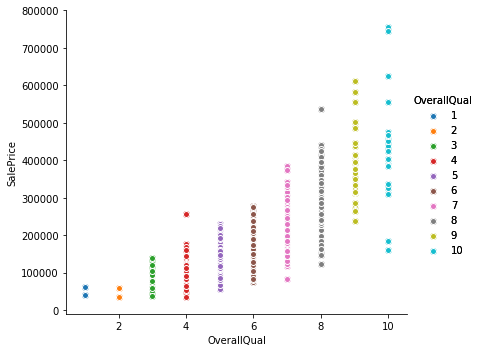

In [60]:
g=sns.FacetGrid(train[columns], hue="OverallQual", height=5) \
   .map(plt.scatter, "OverallQual", "SalePrice") \
   .add_legend()
g=g.map(plt.scatter, "OverallQual", "SalePrice",edgecolor="w").add_legend();
plt.show()

# Boxplots

{'boxes': [<matplotlib.lines.Line2D at 0x24616e2a278>],
 'caps': [<matplotlib.lines.Line2D at 0x24616e2aa58>,
 'fliers': [<matplotlib.lines.Line2D at 0x24616e21470>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24616e21128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24616e2a3c8>,
  <matplotlib.lines.Line2D at 0x24616e2a710>]}

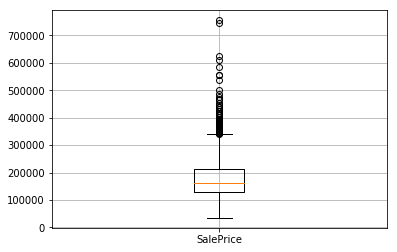

In [67]:
plt.grid(which='major', axis='both')
plt.boxplot(train['SalePrice'], labels=['SalePrice'])

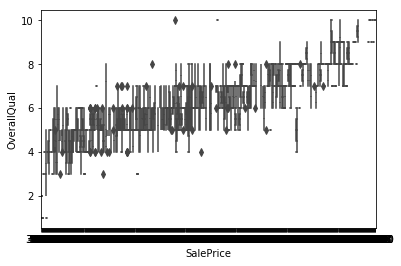

In [68]:
sns.boxplot(x="SalePrice", y="OverallQual", data=train[columns] )
plt.show()

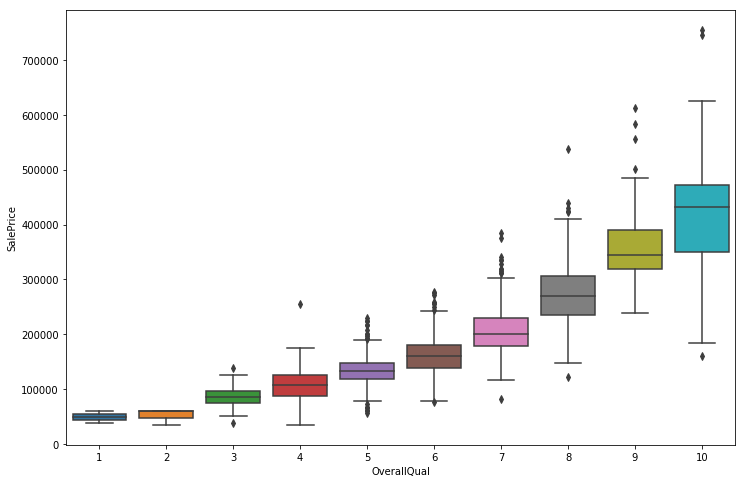

In [69]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

# Histogram

<Figure size 432x288 with 0 Axes>

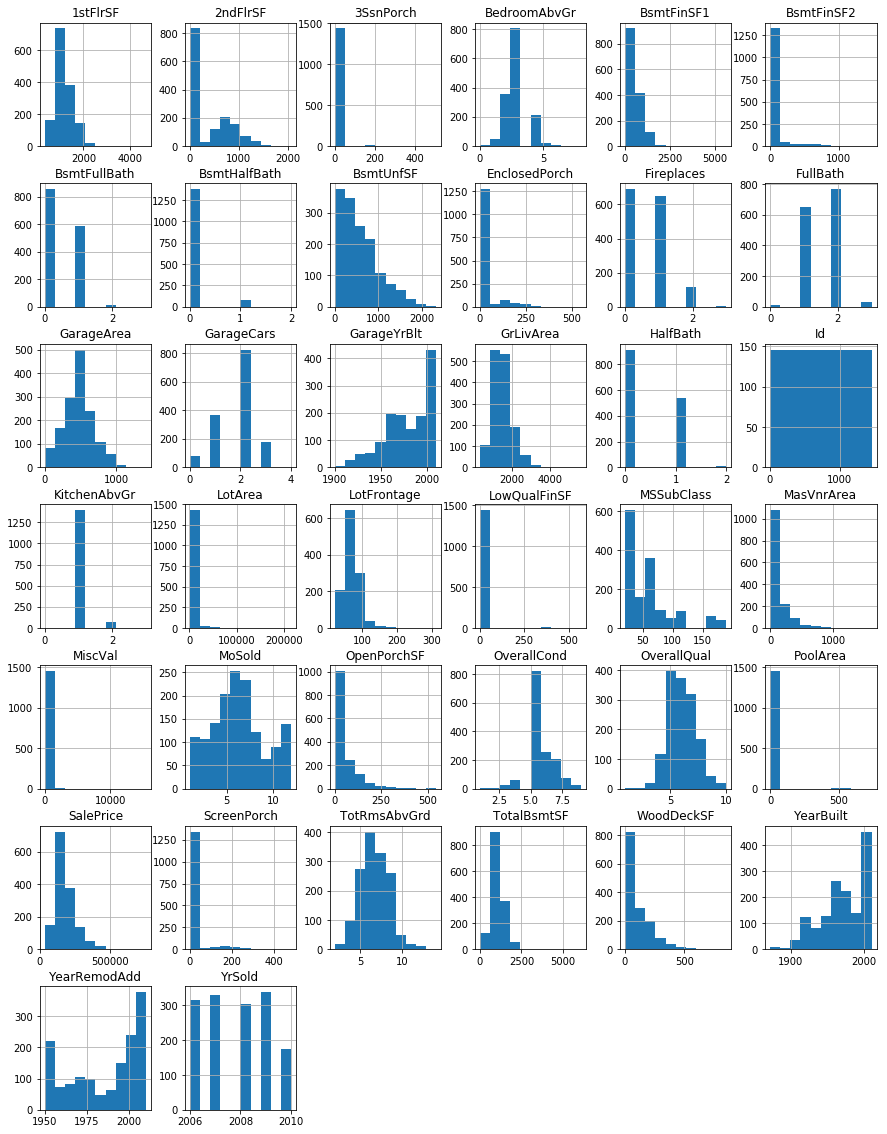

<Figure size 432x288 with 0 Axes>

In [70]:
train.hist(figsize=(15,20))
plt.figure()

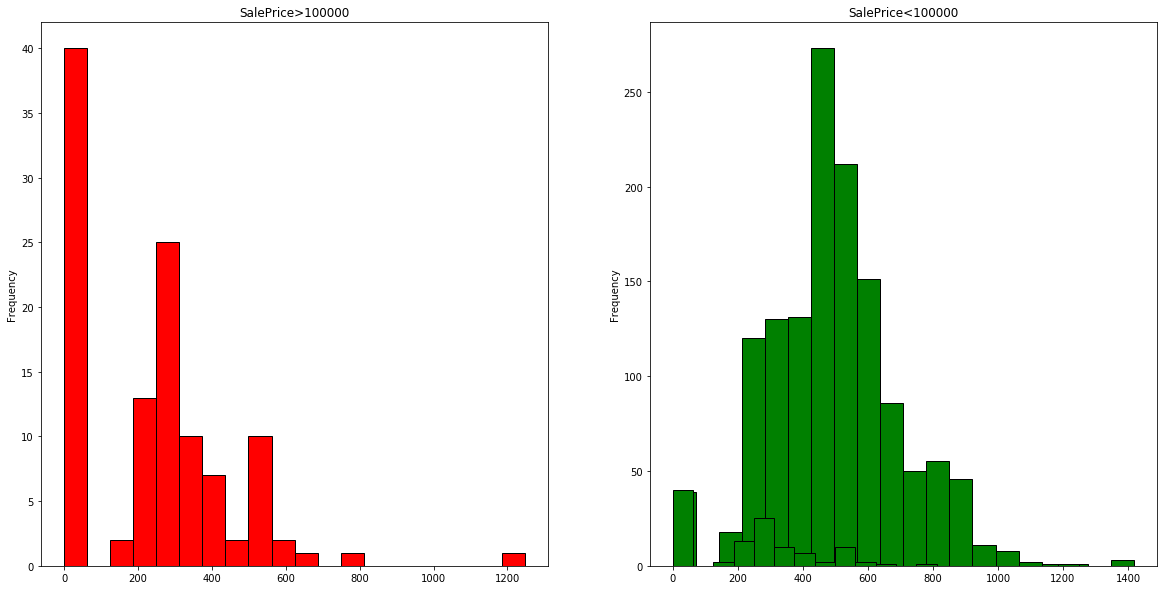

In [82]:
mini_train=train[columns]
f,ax=plt.subplots(1,2,figsize=(20,10))
mini_train[mini_train['SalePrice']<100000].GarageArea.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
mini_train[mini_train['SalePrice']>100000].GarageArea.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[0].set_title('SalePrice>100000')

mini_train[mini_train['SalePrice']<100000].GarageArea.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('SalePrice<100000')

plt.show()

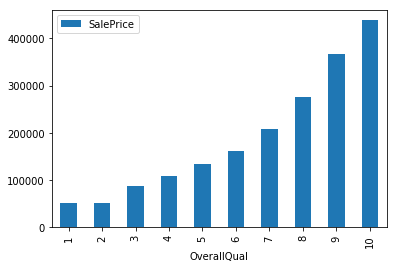

In [83]:
mini_train[['SalePrice','OverallQual']].groupby(['OverallQual']).mean().plot.bar()

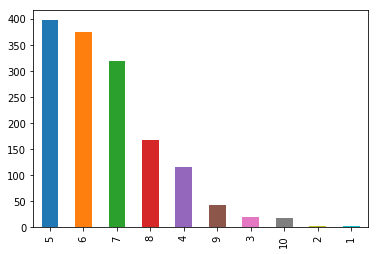

In [84]:
train['OverallQual'].value_counts().plot(kind="bar");

##### It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.



# Multivariate Plots

##### Now we can look at the interactions between the variables.

### Scatterplot matrix

<Figure size 432x288 with 0 Axes>

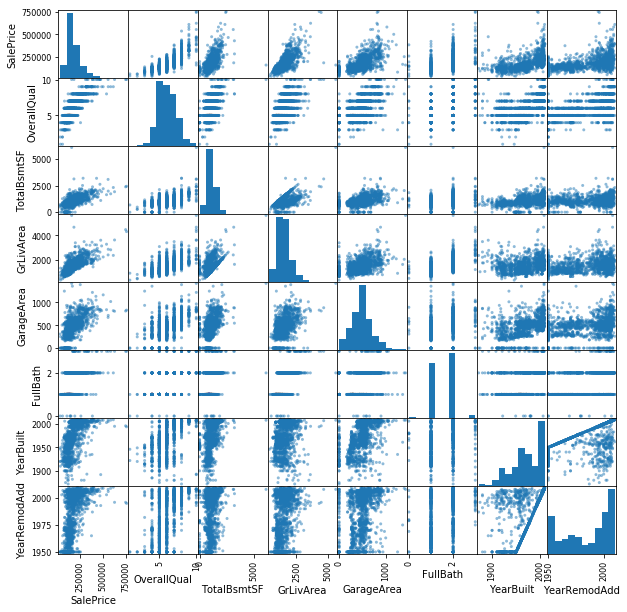

<Figure size 432x288 with 0 Axes>

In [92]:
pd.plotting.scatter_matrix(train[columns],figsize=(10,10))
plt.figure()

### Violinplots

C:\Users\i_lovedeepika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


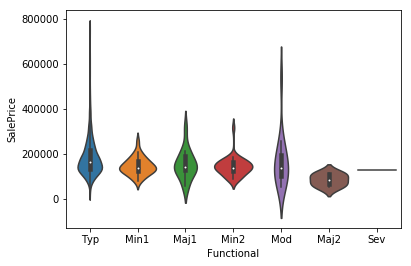

In [93]:
sns.violinplot(data=train,x="Functional", y="SalePrice")

### Pairplots
###### Using seaborn pairplot to see the bivariate relation between each pair of features



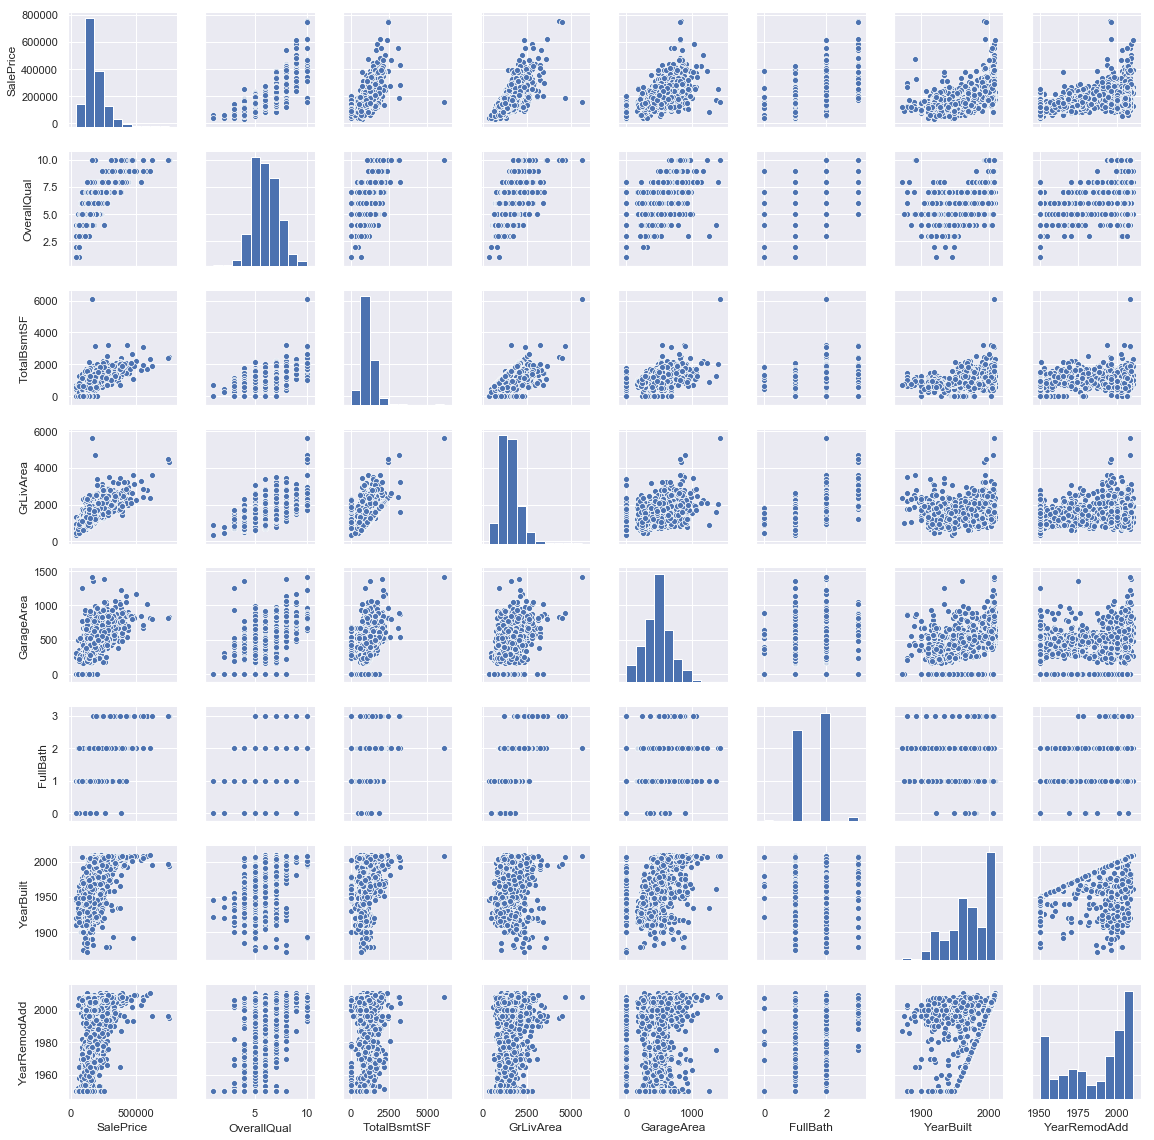

In [95]:
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(train[columns],height = 2 ,kind ='scatter')
plt.show()

### Kdeplot
###### Size can be changed by tweeking the value used

C:\Users\i_lovedeepika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


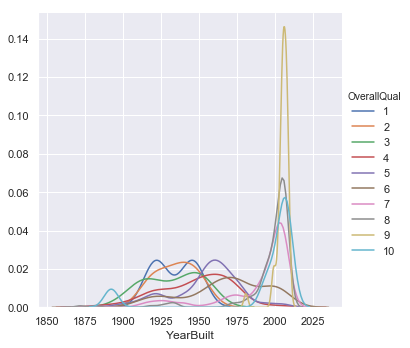

In [97]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.FacetGrid(train[columns], hue="OverallQual", height=5).map(sns.kdeplot, "YearBuilt").add_legend()
plt.show()

### Jointplot
##### Use seaborn's jointplot to make a hexagonal bin plot
##### Set desired size and ratio and choose a color.

C:\Users\i_lovedeepika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


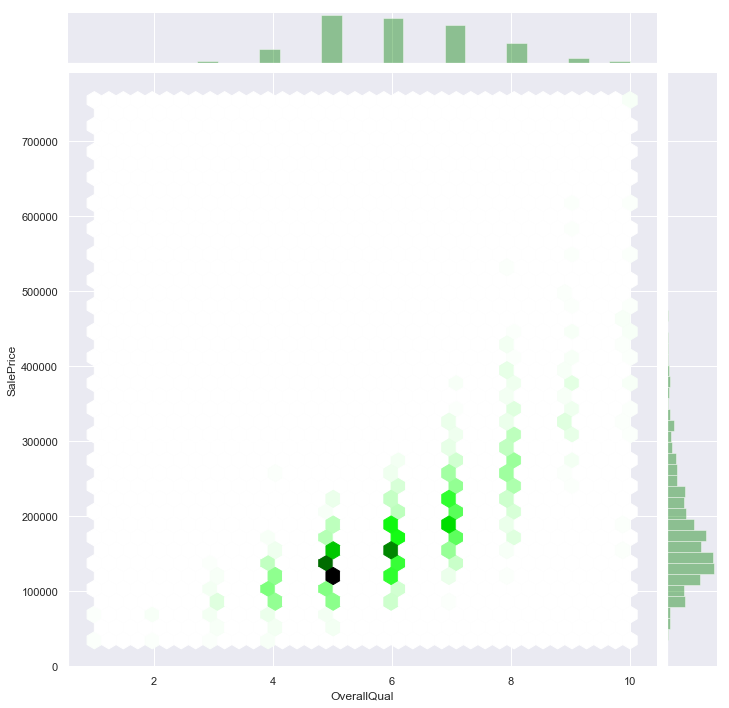

In [99]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.jointplot(x="OverallQual", y="SalePrice", data=train[columns], height=10,ratio=10, kind='hex',color='green')
plt.show()

### Andrews curves
###### In Pandas use Andrews Curves to plot and visualize data structure.
###### Each multivariate observation is transformed into a curve and represents the coefficients of a Fourier series.
###### This useful for detecting outliers in times series data.
###### Use colormap to change the color of the curves


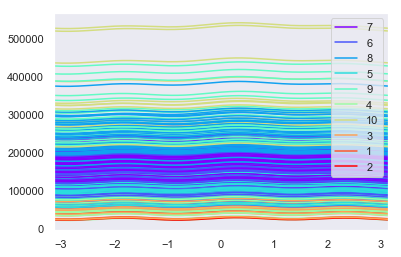

In [102]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
from pandas.plotting import andrews_curves
andrews_curves(train[columns], "OverallQual",colormap='rainbow')
plt.show()

##### we will use seaborn jointplot shows bivariate scatterplots and univariate histograms with Kernel density estimation in the same figure

C:\Users\i_lovedeepika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


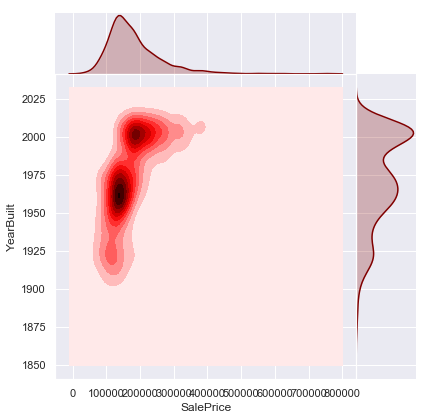

In [104]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.jointplot(x="SalePrice", y="YearBuilt", data=train[columns], height=6, kind='kde', color='#800000', space=0)

### Heatmaps


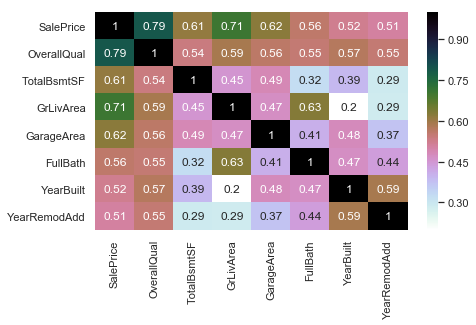

In [105]:
plt.figure(figsize=(7,4)) 
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.heatmap(train[columns].corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

##### A final multivariate visualization technique pandas has is radviz which puts each feature as a point on a 2D plane, and then simulates having each sample attached to those points through a spring weighted by the relative value for that feature

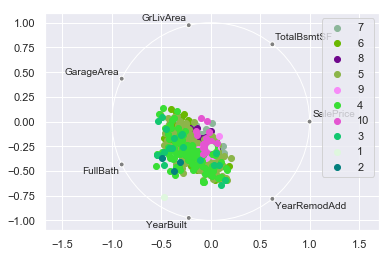

In [106]:
from pandas.plotting import radviz
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
radviz(train[columns], "OverallQual")

### Catplot


C:\Users\i_lovedeepika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


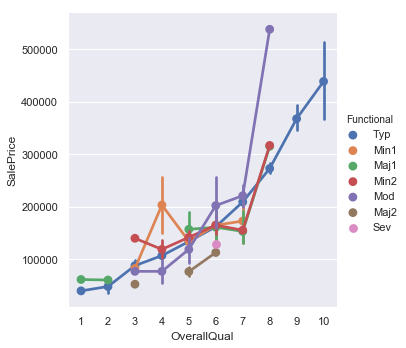

In [112]:
sns.catplot('OverallQual','SalePrice',hue='Functional',data=train, kind='point')
plt.show()

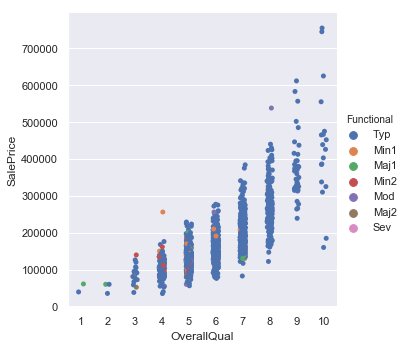

In [113]:
sns.catplot('OverallQual','SalePrice',hue='Functional',data=train)
plt.show()